#### 실습 : https://github.com/datawithnosense/Python

# CHAPTER 4 통계분석과 기본 그래프

## 01 어제까지 몇 마리의 병아리가 부화했을까? (기초통계량)

### 1-1 데이터 불러오기

In [33]:
# pandas 패키지 불러오기 및 pd라는 역어로 지칭하기
import pandas as pd
hat=pd.read_csv("ch4-1.csv")

### 1-2 데이터 확인하기

In [34]:
hat

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24
5,F,28
6,G,27


In [2]:
hat.head() # 위에서부터 5개 데이터 확인

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24


In [3]:
hat.tail(3) #아래에서부터 3개 데이터 확인

,hatchery,chick
4,E,24
5,F,28
6,G,27


### 1-3 기초 통계량 구하기

In [7]:
hat.chick.sum() #합계

194

In [8]:
hat['chick'].sum() #합계

194

In [9]:
hat['chick'].mean()  #평균

27.714285714285715

In [10]:
hat['chick'].std() #표준편차

2.2146697055682827

In [11]:
hat['chick'].median() #중앙값

28.0

In [12]:
hat['chick'].min() #최소값

24

In [13]:
hat['chick'].max() #최대값

30

### 1-4 데이터 정렬하기

In [16]:
# 데이터 정렬하기, chick열을 기준으로 오름차순 정렬
hat.sort_values(by=['chick'],ascending=True)

,hatchery,chick
4,E,24
3,D,26
6,G,27
5,F,28
2,C,29
0,A,30
1,B,30


### 1-5 막대 그래프 그려보기

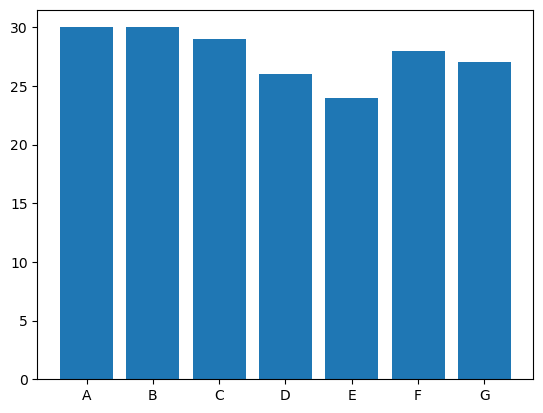

In [18]:
# 그래프용 matplotlib.pyplot 모듈 불러오기 및 plt라는 약어로 지정
import matplotlib.pyplot as plt
# 막대 그래프 그리기
plt.bar(hat['hatchery'],hat['chick'])
plt.show()

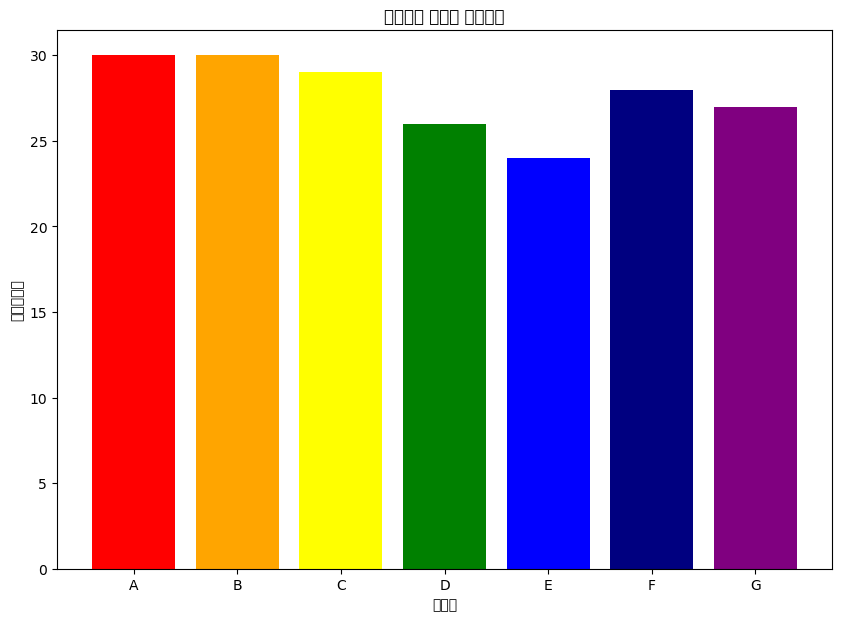

In [20]:
# 막대 그래프 그리기, 다양한 파라미터 추가
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'],hat['chick'], color=('red','orange','yellow','green','blue','navy','purple'))
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

### 1-6 한글 폰트 지정 및 그래프 색상 바꿔보기

In [7]:
# 그래프 한글 깨짐 문제 해결을 위해 맑은고딕 폰트 지정
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

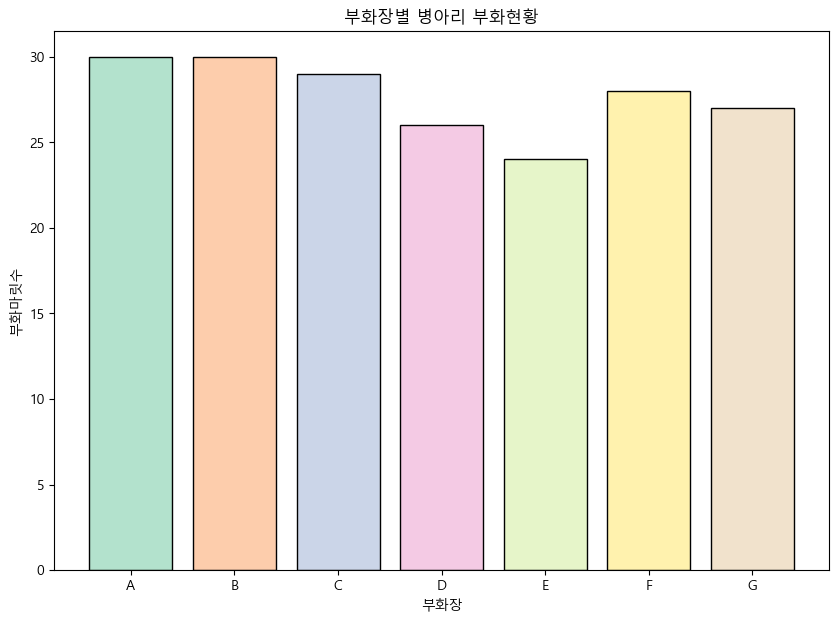

In [22]:
# 예쁜 색상 지정을 위한 seaborn 패키지 불러오기
import seaborn as sns
col7=sns.color_palette('Pastel2',7)
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'],hat['chick'], color=col7, edgecolor='black')
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

### 1-7 그래프 위에 텍스트 추가하기

In [23]:
# 텍스트 추가 사용자 정의 함수 만들기
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+0.5, y[i], ha='center')

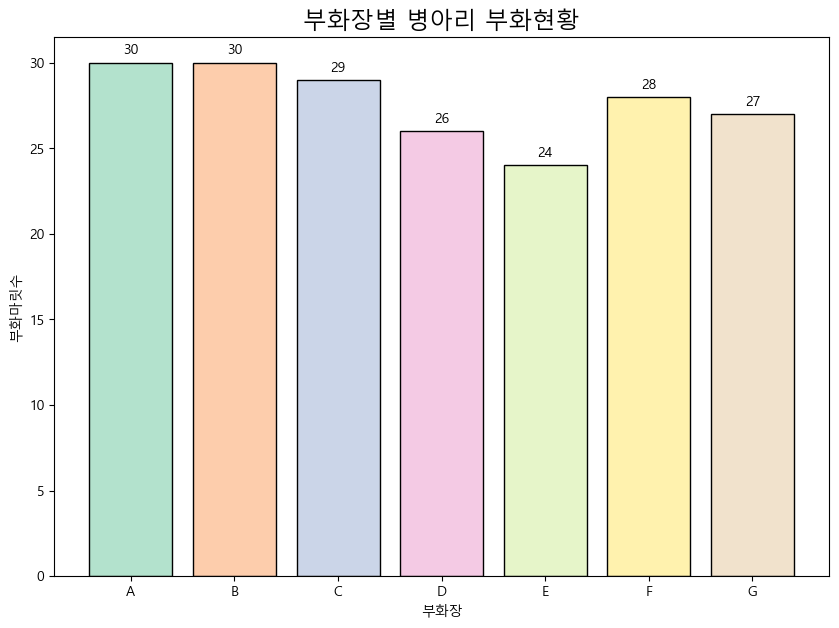

In [24]:
# 막대 위에 택스트 추가하기
col7=sns.color_palette('Pastel2',7)
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'],hat['chick'], color=col7, edgecolor='black')
addtext(hat['hatchery'],hat['chick']) #텍스트 표시 사용자 정의 함수 추가
plt.title('부화장별 병아리 부화현황', fontsize=17)
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

### 1-8 그래프 위에 선 추가하기

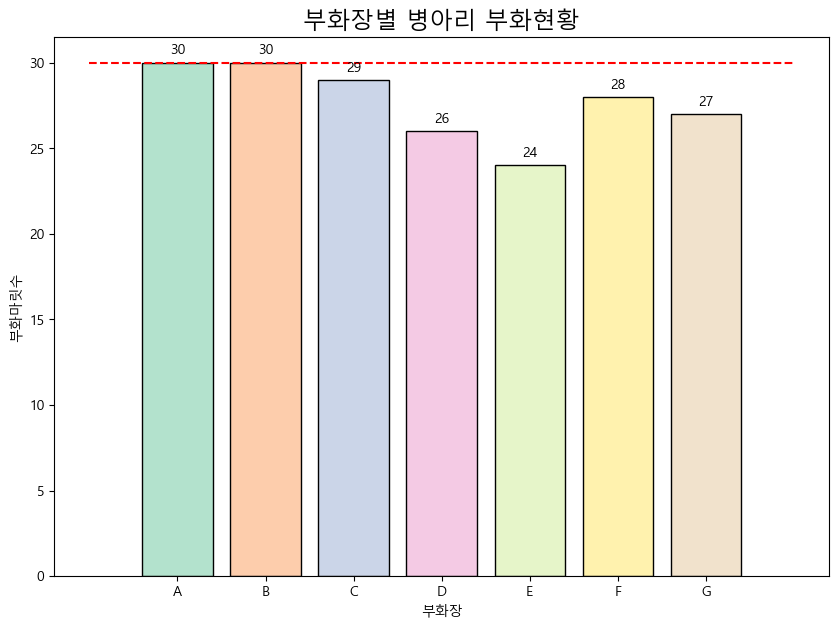

In [25]:
# 빨간색 수평선 추가하기
col7=sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10,7))
plt.bar(hat['hatchery'], hat['chick'], color=col7, edgecolor='black')
addtext(hat['hatchery'],hat['chick']) #텍스트 표시 사용자 정의 함수 추가
plt.hlines(30, -1, 7, colors='red', linestyles='dashed')
plt.title('부화장별 병아리 부화현황', fontsize=17)
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

### 1-9 파이 차트 그려보기

In [26]:
# 파이 차트를 그리기 위해 비율 계산
pct=hat['chick']/hat['chick'].sum()
pct

0    0.154639
1    0.154639
2    0.149485
3    0.134021
4    0.123711
5    0.144330
6    0.139175
Name: chick, dtype: float64

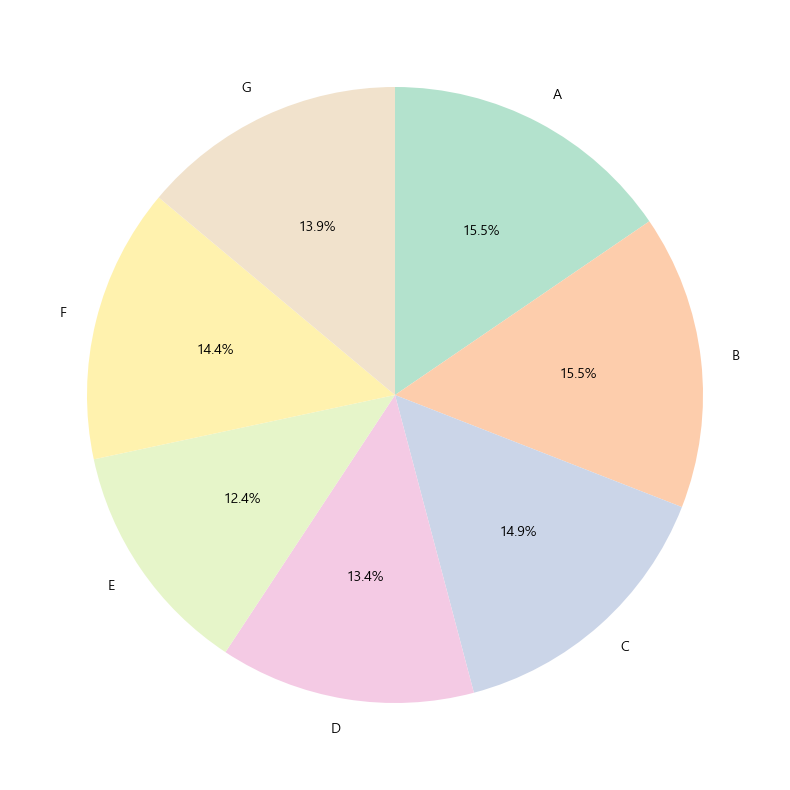

In [27]:
# 파이 차트 그리기
col7=sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10,10))
plt.pie(pct, labels=hat['hatchery'], autopct='%.1f%%', colors=col7, startangle=90, counterclock=False)
plt.show()

## 02 부화한 병아리들의 몸무게는 얼마일가? (정규분포와 중심극한정리)

### 2-1 데이터 불러와서 구조와 유형 확인하기

In [3]:
# pandas 패키지 불러오기 및 pd라는 약어로 지정하기
import pandas as pd
b = pd.read_csv('ch4-2.csv') # b변수에 데이터 셋 입력
b.head() # 데이터 상위 5개만 확인

,chick_nm,weight
0,b01,37
1,b02,39
2,b03,41
3,b04,45
4,b05,37


In [4]:
b.info() # b 데이터 셋 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chick_nm  30 non-null     object
 1   weight    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


### 2-2 통계량으로 분포 확인하기

In [5]:
b.describe() #b 데이터 셋 기초 통계량 확인

,weight
count,30.000000
mean,38.400000
std,3.286335
min,31.000000
25%,36.250000
50%,39.000000
75%,40.750000
max,45.000000


### 2-3 히스토그램으로 분포 확인하기

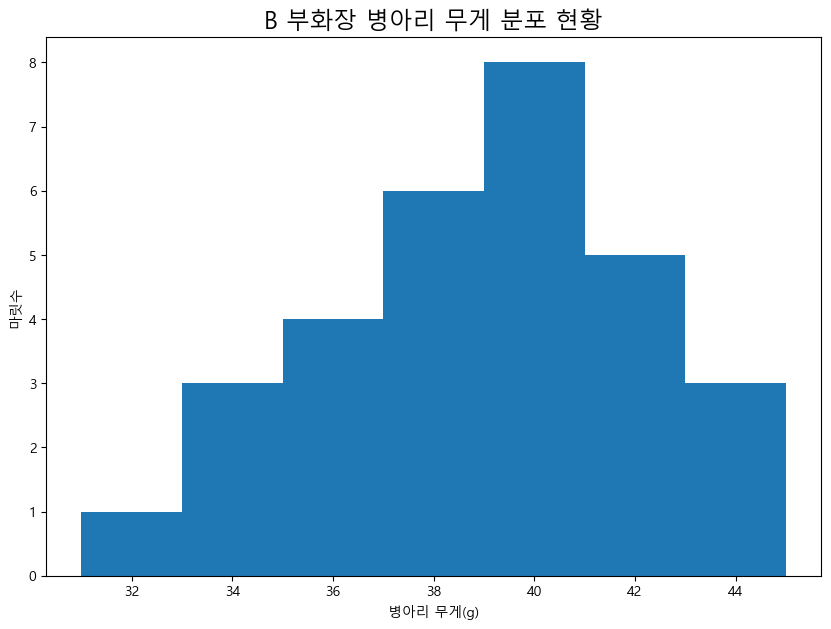

In [8]:
# 그래프용 matplolib.pyplot 모듈 불러오기 및 plt라는 약어로 지정하기
import matplotlib.pyplot as plt
# 히스토그램 그리기
plt.figure(figsize=(10,7))
plt.hist(b.weight, bins = 7)
plt.title('B 부화장 병아리 무게 분포 현황', fontsize=17)
plt.xlabel('병아리 무게(g)')
plt.ylabel('마릿수')
plt.show()

### 2-4 상자그림으로 분포 확인하기

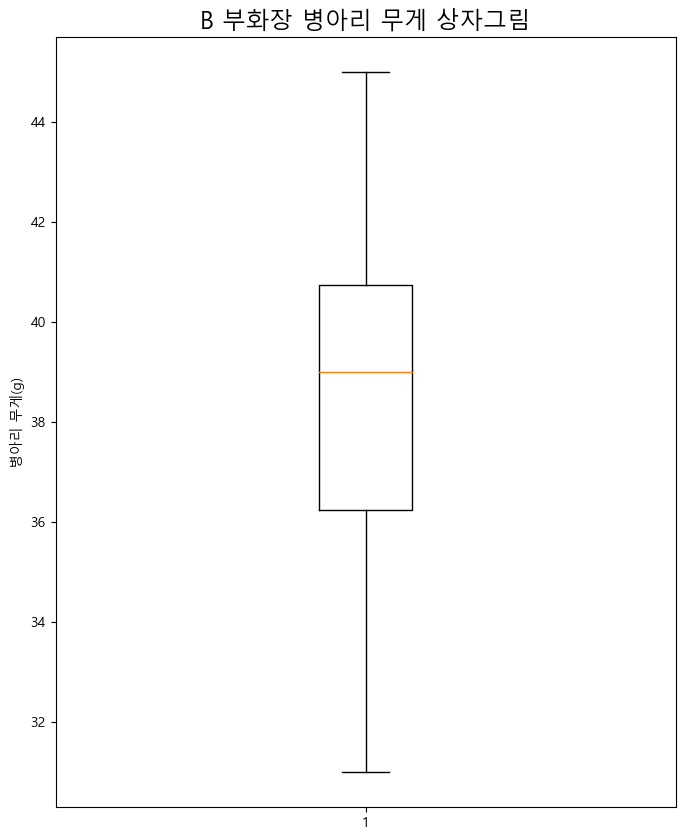

In [10]:
# 상자그림 그리기
plt.figure(figsize=(8,10))
plt.boxplot(b.weight)
plt.title('B 부화장 병아리 무게 상자그림', fontsize=17)
plt.ylabel('병아리 무게(g)')
plt.show()

### 2-5 다중 그래프로 분포 확인하기

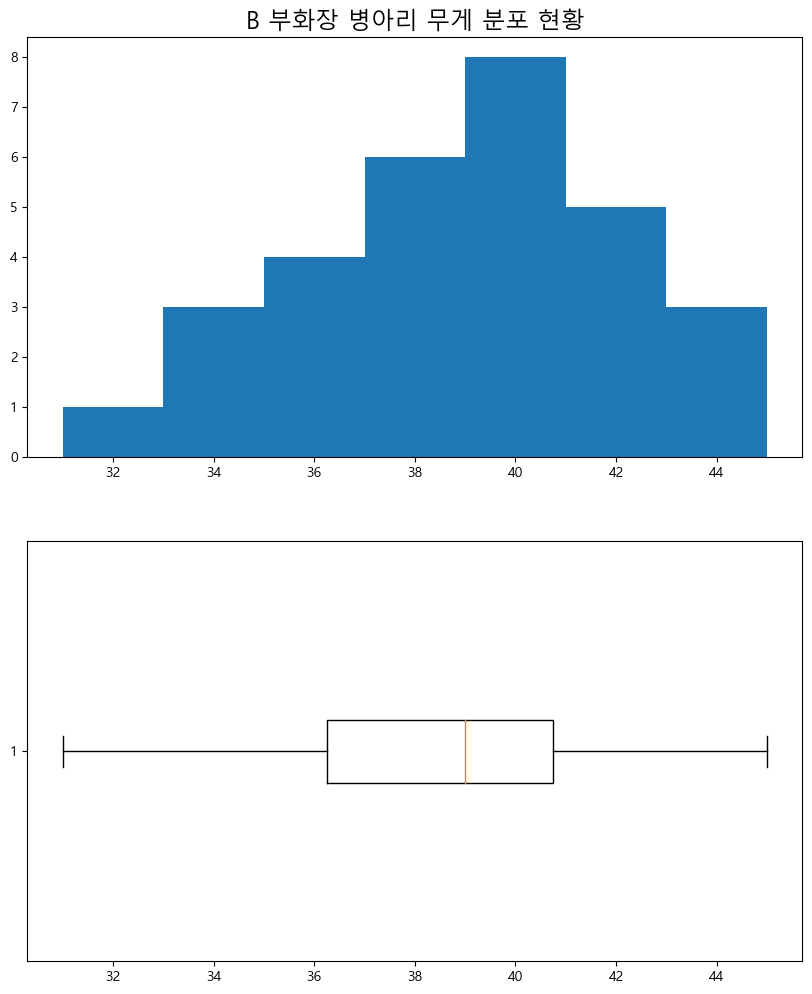

In [12]:
# 히스토그램과 상자그림 한꺼번에 표시
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.hist(b.weight, bins=7)
plt.title('B 부화장 병아리 무게 분포 현황', fontsize=17)
plt.subplot(2,1,2)
plt.boxplot(b.weight, vert=False)
plt.show()

## 03 사료 제조사별 성능 차이가 있을까?

### 3-1 데이터 불러와서 확인하기

In [14]:
# pandas 패키지 불러오기 및 pd라는 약어로 지칭하기
import pandas as pd
test=pd.read_csv('ch4-3.csv') # test 변수에 데이터 셋 입력
test

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116
5,A,a17,118
6,A,a26,110
7,A,a28,112
8,A,a29,106
9,A,a30,108


### 3-2 상자그림으로 분포 비교하기

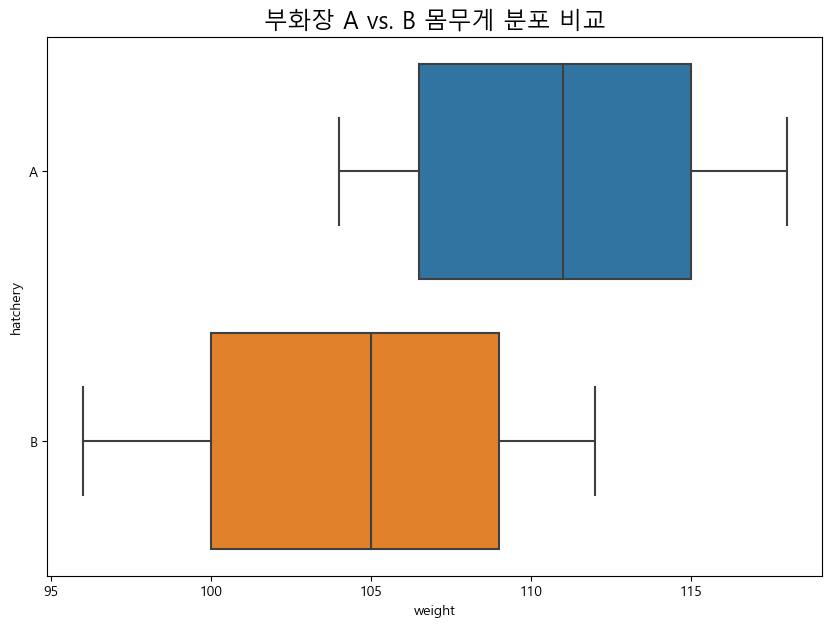

In [16]:
# seaborn 패키지 이용 그룹별 상자그림 그리기
import seaborn as sns
plt.figure(figsize=(10,7))
sns.boxplot(x='weight', y='hatchery', data=test)
plt.title('부화장 A vs. B 몸무게 분포 비교', fontsize=17)
plt.show()

### 3-3 정규분포인지 검정하기

In [24]:
# 가설검정을 위한 scipy 패키지 불러오기 및 sp라는 약어로 지칭하기
import scipy as sp
# 부화장 A만 별도로 데이터 셋 구성
test_a = test.loc[test.hatchery=='A','weight']
# 부화장 B만 별도로 데이터 셋 구성
test_b = test.loc[test.hatchery=='B','weight']
# 부화장 A 샤피로-윌크 검정 실시
sp.stats.shapiro(test_a)

ShapiroResult(statistic=0.9400018453598022, pvalue=0.5530338883399963)

In [25]:
# 부화장 B 샤피로-윌크 검정 실시
sp.stats.shapiro(test_b)

ShapiroResult(statistic=0.9390683770179749, pvalue=0.5426943302154541)

### t-test로 두 집간 간 평균 검정하기

In [26]:
# 부화장 A,B 두 집단 간 평균 검정
sp.stats.ttest_ind(test_a, test_b)

TtestResult(statistic=2.842528280230058, pvalue=0.010803990633924202, df=18.0)

# CHAPTER 5 상관분석과 회귀분석

## 01 병아리의 성장에 영향을 미치는 인자는 무엇일까? (상관분석)

### 1-1 상관분석이란?

### 1-2 데이터 불러와서 확인하기

In [27]:
# pandas 패키지 불러오기 및 pd라는 약어로 지칭하기
import pandas as pd
w = pd.read_csv('ch5-1.csv') # w변수에 데이터 셋 입력
w.head() # 위에서부터 5개 데이터 확인

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13
3,a04,135,65,157,13
4,a05,145,69,157,13


In [28]:
w.info() #데이터 구조 및 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


### 1-3 상관분석을 위한 별도 데이터 셋 만들기

In [29]:
# w데이터 셋에서 1~4열 데이터만 가져오기
w_n = w.iloc[:, 1:5]
w_n.head()

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13


### 1-4 상관분석 실시

In [32]:
# 상관분석 실시
w_cor=w_n.corr(method='pearson')
w_cor

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


### 1-5 상관분석 결과 표현하기

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


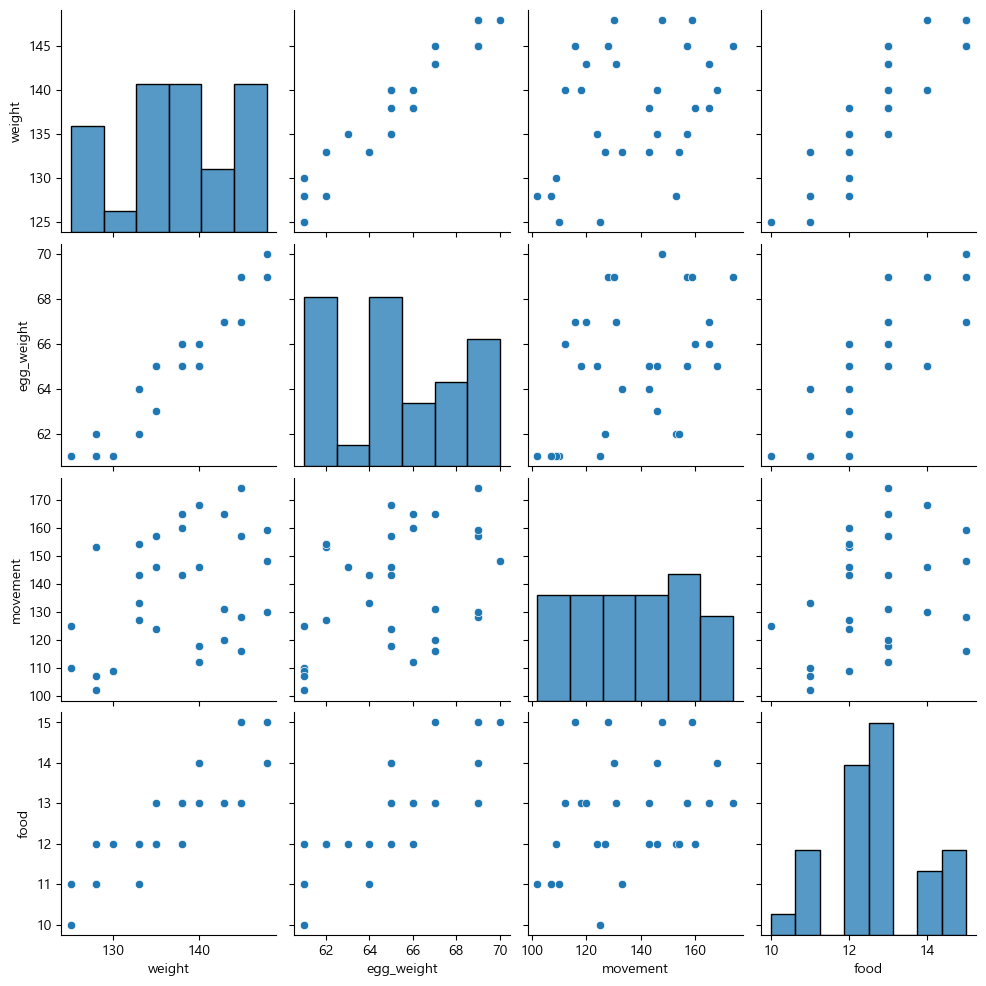

In [33]:
# 상관관계 시각화를 위한 모듈 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(w_n)

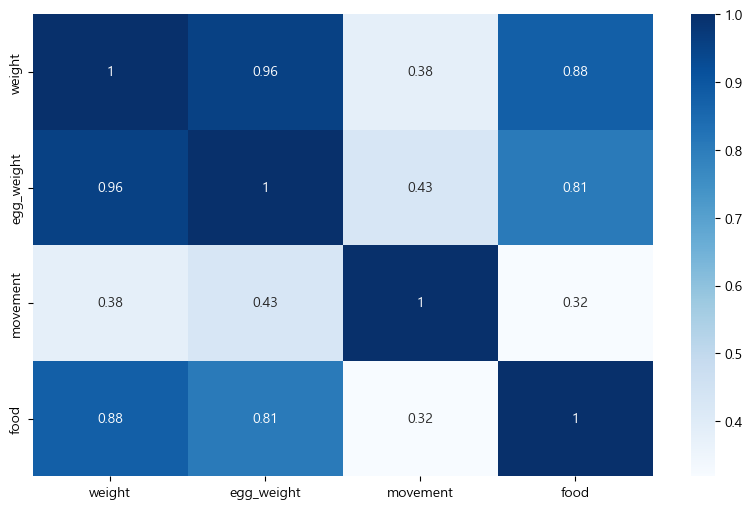

In [34]:
# 상관행렬도 그리기
plt.figure(figsize=(10,6))
sns.heatmap(w_cor, annot=True, cmap='Blues')
plt.show()

## 02 병아리의 몸무게를 예측할 수 있을까? (회귀분석)

### 2-1 회귀분석이란?

### 2-2 단순 선형 회귀분석

In [71]:
# 회귀분석 수평을 위한 모듈 불러오기 및 smf라는 약어로 지칭하기
import statsmodels.formula.api as smf
# 종란 무게 - 병아리 몸무게 단순 선형 회귀모델 구축
model_lm = smf.ols(formula='weight ~ egg_weight', data=w_n)
# 모델 학습
result_lm = model_lm.fit()
# 모델 결과 확인
result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.32e-16
Time:                        16:42:24   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

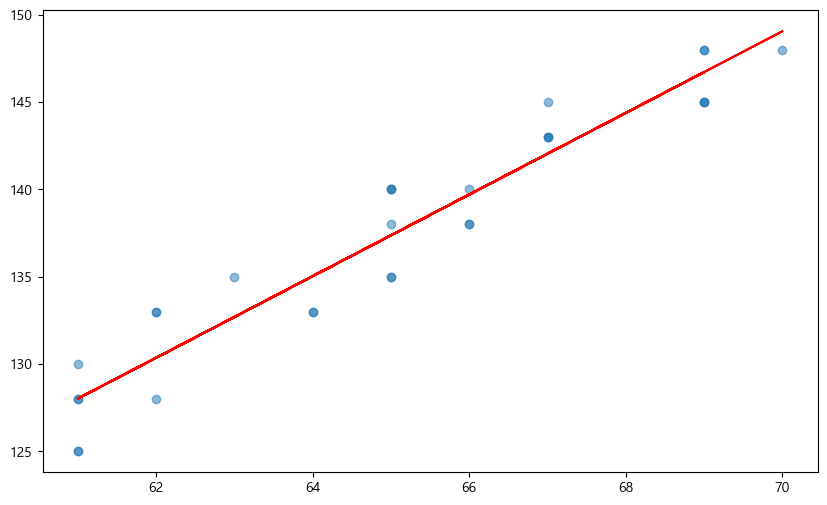

In [72]:
# 종란 무게에 따른 병아리 몸무게 산점도
plt.figure(figsize=(10,6))
plt.scatter(w.egg_weight, w.weight, alpha=.5)
plt.plot(w.egg_weight, w.egg_weight*2.3371 - 14.5475, color='red')

In [73]:
# 잔차 5개만 확인
result_lm.resid.head()

0    2.633714
1   -2.354880
2    2.633714
3   -2.366286
4   -1.714829
dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


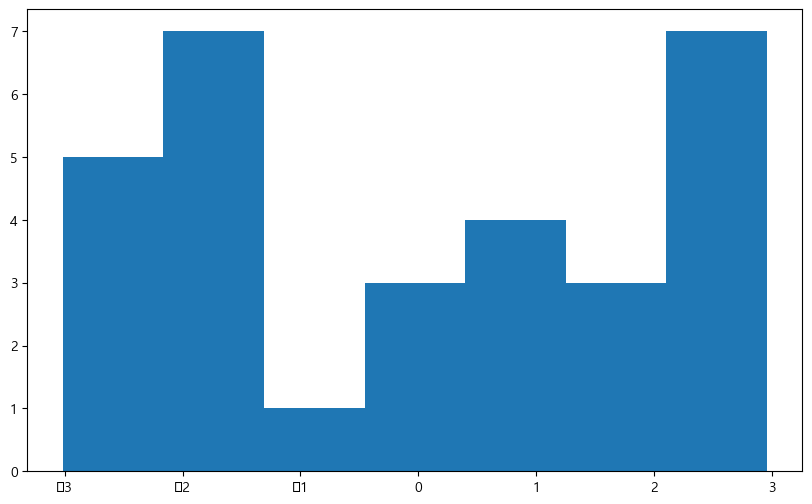

In [74]:
# 잔차 히스토그램 그리기
plt.figure(figsize=(10,6))
plt.hist(result_lm.resid, bins=7)
plt.show()

### 2-3 다중 회귀분석

In [75]:
# 병아리 몸무게 예측을 위한 다중 회귀분석 실시
model_mlm=smf.ols(formula='weight ~ egg_weight + food + movement', data=w_n)
result_mlm=model_mlm.fit()
result_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           8.46e-17
Time:                        16:42:33   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
# 병아리 몸무게 예측을 위한 다중 회귀분석 실시2
model_mlm2 = smf.ols(formula='weight ~ egg_weight + food', data=w_n)
result_mlm2 = model_mlm2.fit()
result_mlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           5.44e-18
Time:                        16:42:35   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2-4 다중공선성

In [77]:
# 다중공선성 확인을 위한 함수 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 회귀모델 변수명 속성
model_mlm2.exog_names

['Intercept', 'egg_weight', 'food']

In [78]:
# 1번째 변수(egg_weight) vif 계산
vif1=variance_inflation_factor(model_mlm2.exog, 1)
# 2번째 변수(food) vif 계산
vif2=variance_inflation_factor(model_mlm2.exog, 2)
print(vif1, vif2)

2.882684511307579 2.8826845113075765


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


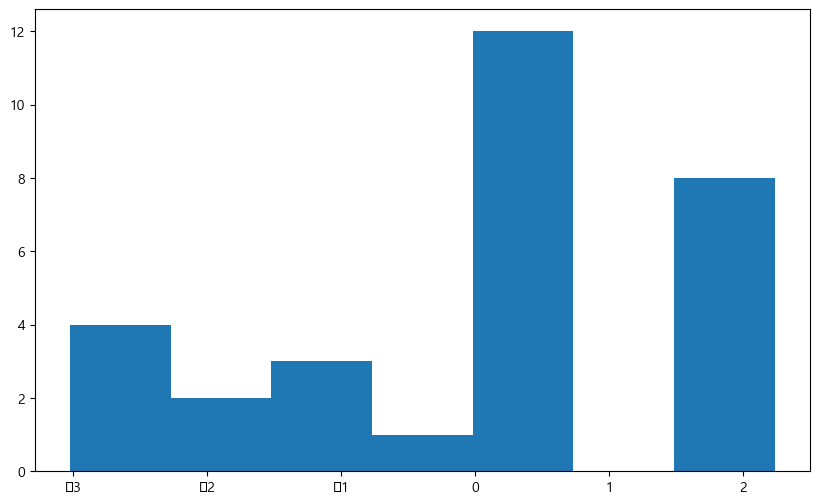

In [79]:
# 잔차 히스토그램 그리기
plt.figure(figsize=(10,6))
plt.hist(result_mlm2.resid, bins=7)
plt.show()

### 2-5 비선형 회귀분석

In [80]:
w2=pd.read_csv('ch5-2.csv') # w2 변수에 데이터 셋 입력
w2.head()

,day,weight
0,1,43
1,2,55
2,3,69
3,4,86
4,5,104


In [81]:
w2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   day     70 non-null     int64
 1   weight  70 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


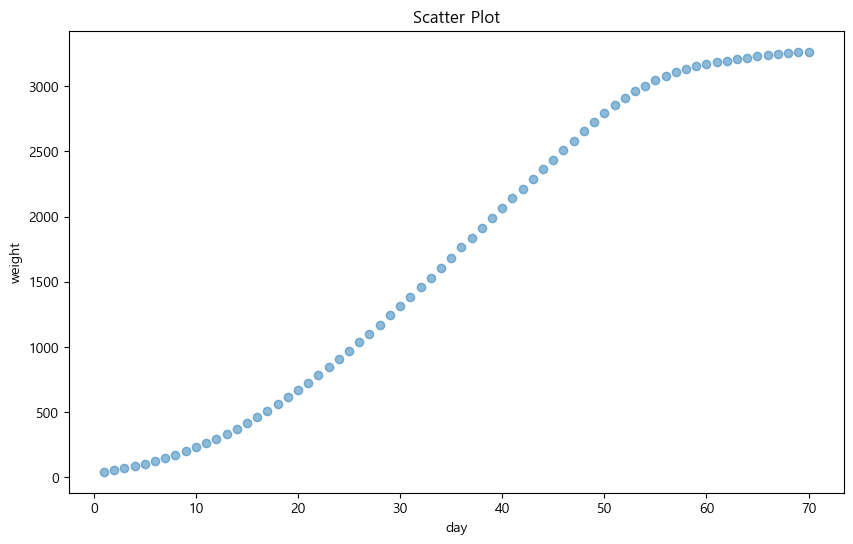

In [82]:
# 성장기간에 따른 병아리 몸무게 변화
plt.figure(figsize=(10,6))
plt.scatter(w2.day, w2.weight, alpha=.5)
plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()

In [83]:
# 성장기간에 따른 병아리 몸무게 변환 선형 회귀분석 실시
model_lm2=smf.ols(formula='weight ~ day', data=w2)
result_lm2=model_lm2.fit()
result_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3189.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           7.22e-59
Time:                        16:42:47   Log-Likelihood:                -457.86
No. Observations:                  70   AIC:                             919.7
Df Residuals:                      68   BIC:                             924.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -295.8671     41.102     -7.198      0.000    -377.885    -213.850
day           56.8216      1.006     56.470      0.000      54.814      58.830
==============================================================================
Omnibus:                        3.866   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.079
Skew:                          -0.133   Prob(JB):                        0.354
Kurtosis:                       2.199   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

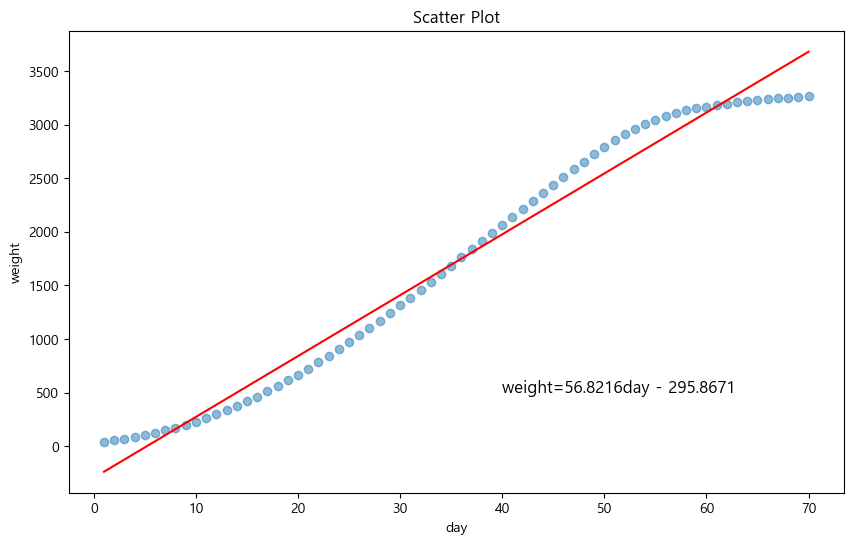

In [84]:
# 성장기간에 따른 병아리 몸무게 변화
plt.figure(figsize=(10,6))
plt.scatter(w2.day, w2.weight, alpha=.5)
plt.plot(w2.day, w2.day*56.8216 - 295.8671, color='red')
plt.text(40, 500, 'weight=56.8216day - 295.8671', fontsize=12)
plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()        

In [87]:
# 성장기간에 따른 병아리 몸무게 변화 비선형 회귀분석 실시
model_nlm=smf.ols(formula='weight ~ I(day**3) + I(day**2) + day', data=w2)
result_nlm=model_nlm.fit()
result_nlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.407e+04
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          7.13e-109
Time:                        16:45:17   Log-Likelihood:                -327.17
No. Observations:                  70   AIC:                             662.3
Df Residuals:                      66   BIC:                             671.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.0141     13.476      8.683      0.000      90.108     143.920
I(day ** 3)    -0.0253      0.000    -51.312      0.000      -0.026      -0.024
I(day ** 2)     2.6241      0.053     49.314      0.000       2.518       2.730
day           -15.2978      1.632     -9.373      0.000     -18.557     -12.039
==============================================================================
Omnibus:                        6.702   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                2.680
Skew:                           0.103   Prob(JB):                        0.262
Kurtosis:                       2.064   Cond. No.                     5.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

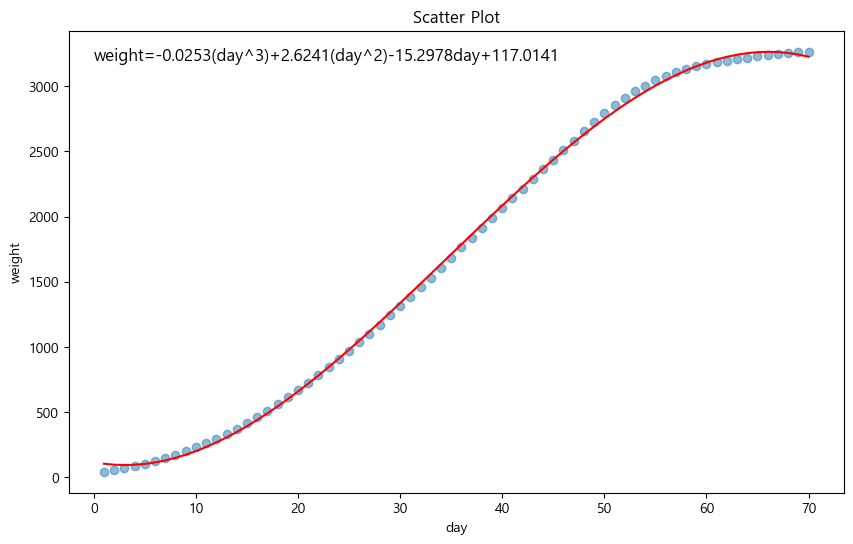

In [89]:
# 성장기간에 따른 병아리 몸무게 변화
plt.figure(figsize=(10,6))
plt.scatter(w2.day, w2.weight, alpha=.5)
plt.plot(w2.day, (w2.day**3)*(-0.0253)+(w2.day**2)*2.6241 + w2.day*(-15.2978) + 117.0141, color='red')
plt.text(0, 3200, 'weight=-0.0253(day^3)+2.6241(day^2)-15.2978day+117.0141', fontsize=12)
plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()

# CHAPTER 6 분류 및 군집분석

## 01 병아리의 성별을 구분할 수 있을까? (로지스틱 회귀)

### 1-1 로지스틱 회귀란?

### 1-2 데이터 불러와서 확인하기

In [90]:
import pandas as pd
g= pd.read_csv('ch6-1.csv')
g.head()

,wing_length,tail_length,gender
0,44,9,m
1,42,9,m
2,43,8,m
3,40,10,m
4,44,8,m


In [91]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   gender       60 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [92]:
# gender 변수의 값 md을 1로, f를 0으로 변경
g['gender']=g['gender'].map({'m':1, 'f':0})
g.head()

,wing_length,tail_length,gender
0,44,9,1
1,42,9,1
2,43,8,1
3,40,10,1
4,44,8,1


### 1-3 로지스틱 회귀분석

In [94]:
# 로지스틱 회귀 구현을 위한 모듈 불러오기
import statsmodels.api as sm
# 모델 구축 및 학습
model_glm = sm.Logit.from_formula('gender ~ wing_length + tail_length', data=g).fit()

Optimization terminated successfully.
         Current function value: 0.137215
         Iterations 9


In [95]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                   60
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                  0.8020
Time:                        16:54:34   Log-Likelihood:                -8.2329
converged:                       True   LL-Null:                       -41.589
Covariance Type:            nonrobust   LLR p-value:                 3.264e-15
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      70.1955     23.410      2.999      0.003      24.313     116.078
wing_length    -1.0531      0.505     -2.087      0.037      -2.042      -0.064
tail_length    -2.3859      0.969     -2.462      0.014      -4.285      -0.486
===============================================================================
"""

### 1-4 분류 알고리즘의 성능 평가 방법

### 1-5 로지스틱 회귀모델의 성능 평가

In [96]:
# predict() 메소드를 이용해 예측값(확률) 생성
y_prob=model_glm.predict(g.iloc[:, 0:2])
# 예측값(확률) 확인
y_prob.head()

0    0.915579
1    0.988904
2    0.997049
3    0.985377
4    0.991588
dtype: float64

In [97]:
# 예측값(확률)을 반올림을 통해 1과 0으로 표현한 뒤 list 타입으로 변경
y_pred=list(map(round, y_prob))
# 예측값(클래스) 확인
y_pred[0:5]

[1, 1, 1, 1, 1]

In [98]:
# 기준값인 gender열을 별도 y로 저장
y=g['gender']

In [99]:
# 정오분류표 함수 불러오기
from sklearn.metrics import confusion_matrix
# 분류 결과 평가, 1을 기준으로
confusion_matrix(y, y_pred, labels=[1,0])

array([[28,  2],
       [ 1, 29]], dtype=int64)

In [100]:
# 분류 리포트 함수 불러오기
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



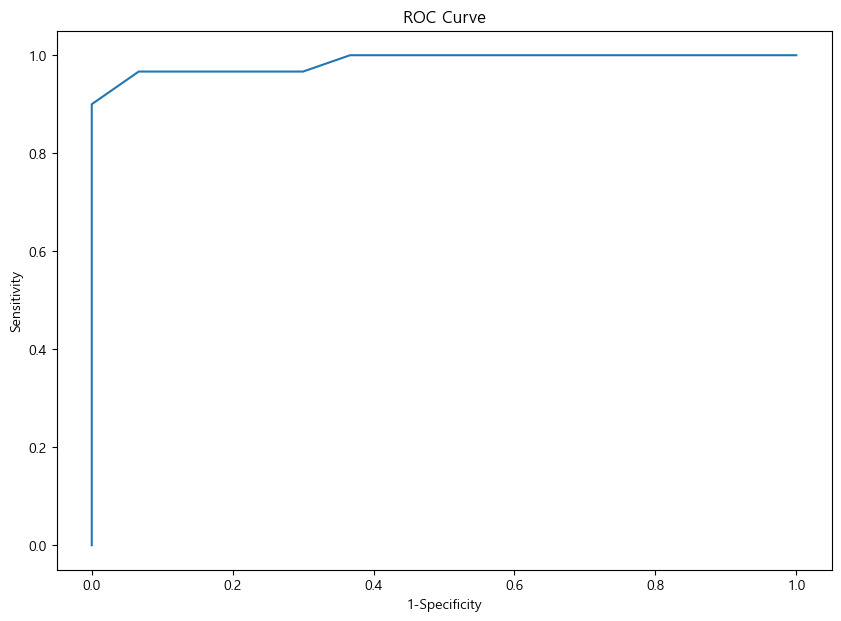

In [102]:
# ROC  커브를 그리기 위한 함수 불러오기
from sklearn.metrics import roc_curve
# ROC 커브를 그리기 위한 변수 설정
fpr, tpr, thresholds=roc_curve(y, y_prob)
# ROC 커브 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [103]:
# AUC 계산을 위한 함수 불러오기
from sklearn.metrics import auc
# AUC 계산
auc(fpr, tpr)

0.9866666666666667

## 02 병아리의 품종을 구분할 수 있을까? (분류 알고리즘)

### 2-1 다양한 분류 알고리즘

## 2-2 나이브 베이즈 분류

In [104]:
# 실습용 데이터 불러오기
import pandas as pd
df_train=pd.read_csv('ch6-2_train.csv')
df_test=pd.read_csv('ch6-2_test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  240 non-null    int64 
 1   tail_length  240 non-null    int64 
 2   comb_height  240 non-null    int64 
 3   breeds       240 non-null    object
dtypes: int64(3), object(1)
memory usage: 7.6+ KB


In [105]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   comb_height  60 non-null     int64 
 3   breeds       60 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [106]:
df_train.head()

,wing_length,tail_length,comb_height,breeds
0,238,63,34,a
1,236,67,30,a
2,256,65,34,a
3,240,63,35,a
4,246,65,30,a


In [110]:
# train, test 데이터 셋 각각 x,y로 분할, ndarray 타입
x_train=df_train.iloc[:,0:3].values
y_train=df_train.iloc[:,3].values
x_test=df_test.iloc[:, 0:3].values
y_test=df_test.iloc[:,3].values

In [111]:
# 나이브 베이즈 알고리즘 수행을 위한 함수 불러오기
from sklearn.naive_bayes import GaussianNB

In [113]:
# 모델 구축 및 학습
model_nb=GaussianNB().fit(x_train, y_train)

In [114]:
# 예측값 생성
y_pred_nb=model_nb.predict(x_test)
# 예측값 확인
y_pred_nb

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'b', 'b', 'b', 'b',
       'a', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'b',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], dtype='<U1')

In [115]:
# 예측 결과 평가
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_nb)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]], dtype=int64)

In [116]:
# 예측 결과 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



### 2-3 k-최근접 이웃

In [120]:
# k-NN 알고리즘 수행을 위한 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier
# 모델 구축(k=3) 및 학습
model_knn=KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)

array([[19,  1,  0],
       [ 1, 16,  3],
       [ 0,  1, 19]], dtype=int64)